In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Data Load

In [3]:
df=pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Quality 

## Completness

In [6]:
print(df.isna().sum())
print(df.isna().sum().sum() / (df.shape[0]*df.shape[1]) *100)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
'''
4 columns have null values
    country 488 
    agent   16340
    company 112593
    children 4

3.38 % is missing values
'''

'\n4 columns have null values\n    country 488 \n    agent   16340\n    company 112593\n    children 4\n\n3.38 % is missing values\n'

## Uniqueness

In [8]:
df.duplicated().sum()

31994

In [9]:
'''
dataset contain 31994 dublicate rows
'''

'\ndataset contain 31994 dublicate rows\n'

## Validity

In [10]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


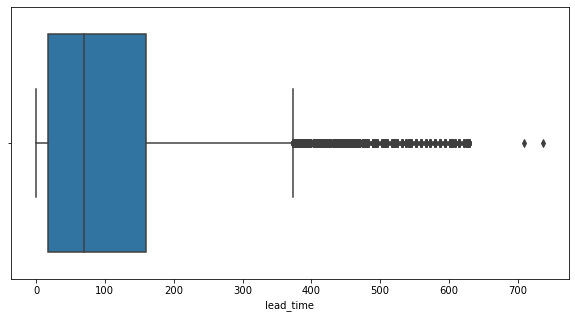

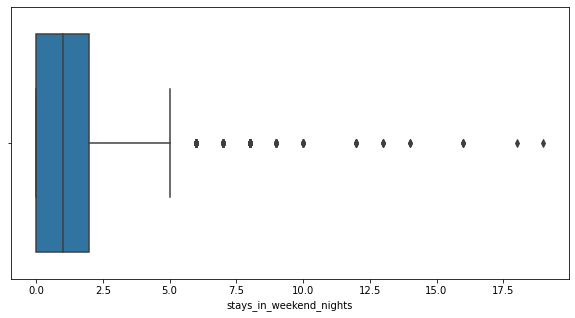

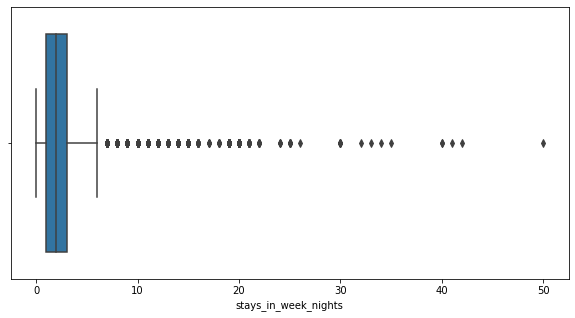

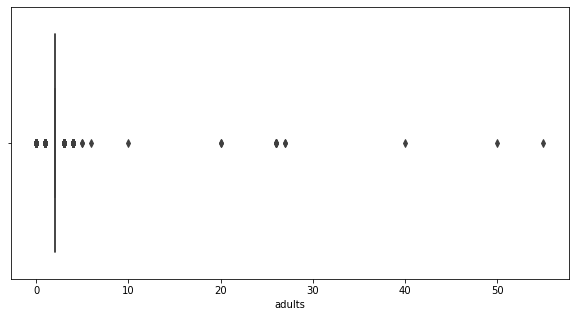

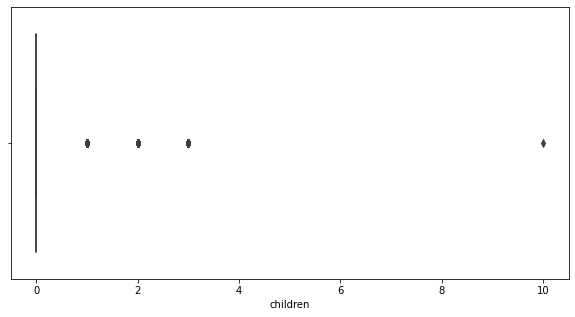

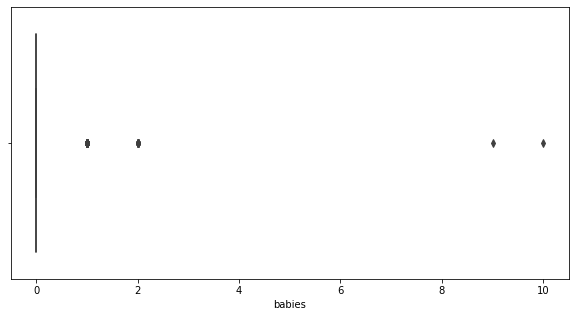

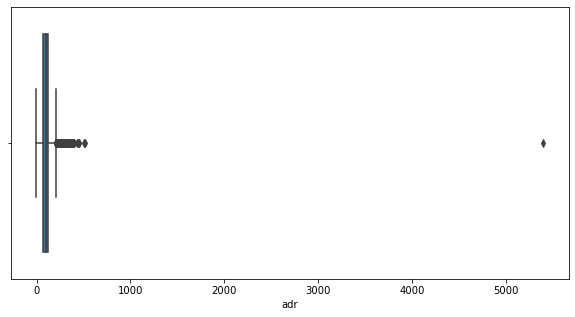

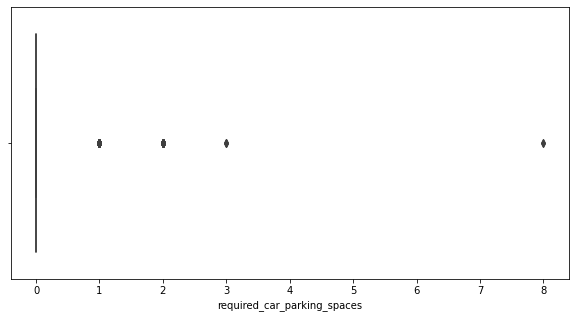

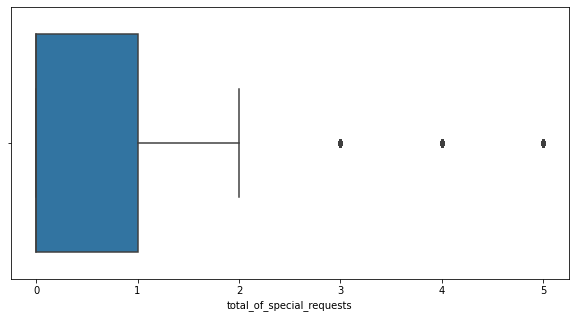

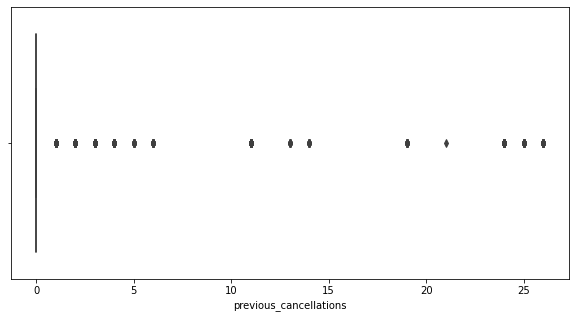

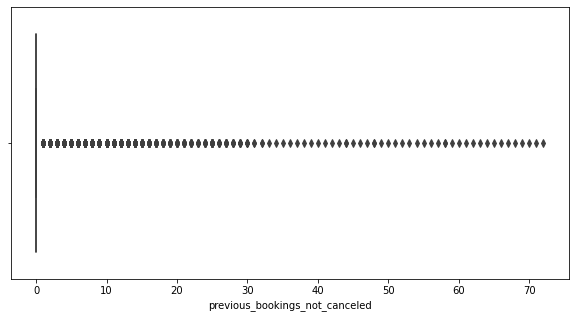

In [12]:
key_numerical_cols = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "adr",
    "required_car_parking_spaces",
    "total_of_special_requests",
    "previous_cancellations",
    "previous_bookings_not_canceled"
]

for col in key_numerical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=col)
    plt.show()

In [13]:
'''
these columns contain siqnificant outliers
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adr",
    "total_of_special_requests",

company take float type as it should be category
'''

'\nthese columns contain siqnificant outliers\n    "lead_time",\n    "stays_in_weekend_nights",\n    "stays_in_week_nights",\n    "adr",\n    "total_of_special_requests",\n\ncompany take float type as it should be category\n'

## Consistency

In [14]:
sorted(df['country'].dropna().unique())

['ABW',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATA',
 'ATF',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CAF',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'CN',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'GAB',
 'GBR',
 'GEO',
 'GGY',
 'GHA',
 'GIB',
 'GLP',
 'GNB',
 'GRC',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HUN',
 'IDN',
 'IMN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JEY',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'MYT',
 'NAM',
 'NCL',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 

# 📝 Data Quality Report  

## 1. Missing Values  
- The dataset contains missing values in **three columns**:  
  - `country`: **488** missing entries  
  - `agent`: **16,340** missing entries  
  - `company`: **112,593** missing entries  
  - `children`: **4** missing entries
- Overall, **3.38% of the dataset has missing values**.  

---

## 2. Duplicate Records  
- The dataset contains **31,994 duplicate rows**.  

---

## 3. Outliers Detected  
Significant outliers were identified in the following **key numerical columns**:  
- `lead_time`  
- `stays_in_weekend_nights`  
- `stays_in_week_nights`   
- `adr`  
- `total_of_special_requests`  

---

## 4. Data Type Issues    
- **`company`**: Currently stored as `float`, should be treated as a **categorical variable**.  

---

## 5. Data Leakage    
- **`reservation_status`** and **`reservation_status_date`** These columns contain information that would not be available at the time of prediction and would make the model **useless in a real-world scenario**.


# Data Cleaning

## Data Lekage

In [15]:
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

## Dtypes 

In [16]:
df['company']=df['company'].astype('object')

In [17]:
for col in df.drop(columns=['company']).select_dtypes(include=['object']):
    df[col]=df[col].astype('category')

## Missing Values

In [18]:
df['company']=df['company'].fillna('None')

In [19]:
df['agent']=df['agent'].fillna(0)

In [20]:
df['country']=df['country'].cat.add_categories('Unknown')

In [21]:
df['country']=df['country'].fillna('Unknown')

In [22]:
df['children']=df['children'].fillna(df['children'].median())

In [23]:
df.isna().sum().sum()

0

## Duplicates

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

## Outliers

c:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


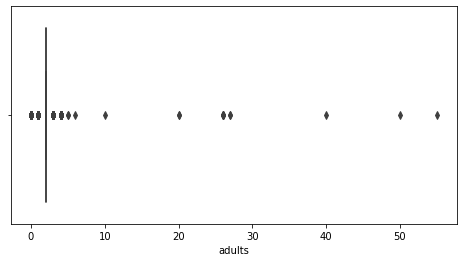

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(df['adults'])
plt.show()

In [27]:
'''
having zero adualts in a reservation dons't make sence so it seem like error ->drop it
clip value above 10 
'''

"\nhaving zero adualts in a reservation dons't make sence so it seem like error ->drop it\nclip value above 10 \n"

In [28]:
df.drop(df[df['adults']==0].index,inplace=True)
df['adults']=df['adults'].clip(upper=10)

In [29]:
key_numerical_cols_outliers=["lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adr",
    "total_of_special_requests"]

In [30]:
for col in key_numerical_cols_outliers:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_cap=q1-iqr*1.5
    upper_cap=q3+iqr*1.5
    df[col].clip(lower=lower_cap,upper=upper_cap,inplace=True)

# Feature Engineering & Preprocessing

## New Features

In [31]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [32]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [33]:
df['is_family']=(df['babies']>0) | (df['children']>0)

## Encode Categorical Variables

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86753 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           86753 non-null  category
 1   is_canceled                     86753 non-null  int64   
 2   lead_time                       86753 non-null  float64 
 3   arrival_date_year               86753 non-null  int64   
 4   arrival_date_month              86753 non-null  category
 5   arrival_date_week_number        86753 non-null  int64   
 6   arrival_date_day_of_month       86753 non-null  int64   
 7   stays_in_weekend_nights         86753 non-null  float64 
 8   stays_in_week_nights            86753 non-null  float64 
 9   adults                          86753 non-null  int64   
 10  children                        86753 non-null  float64 
 11  babies                          86753 non-null  int64   
 12  meal             

In [35]:
category_col=list(df.select_dtypes(include=['object','category']).columns)

In [36]:
for col in category_col:
    print(col, df[col].nunique())

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 9
assigned_room_type 11
deposit_type 3
company 349
customer_type 4


In [37]:
category_col_below_9=[col for col in category_col if df[col].nunique()<9]
category_col_above_9=[col for col in category_col if df[col].nunique()>9]

In [38]:
for col in category_col_above_9:
    freq_encoding=df[col].value_counts()
    df[col]=df[col].map(freq_encoding)

In [39]:
one_hot_encoder=OneHotEncoder(sparse_output=False)

In [40]:
encoded_X=one_hot_encoder.fit_transform(df[category_col_below_9])

In [41]:
temp=pd.DataFrame(encoded_X,columns=one_hot_encoder.get_feature_names_out(),index=df.index)

In [42]:
df=pd.concat([df,temp],axis=1)

In [43]:
df.drop(columns=category_col,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86753 entries, 0 to 119389
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     86753 non-null  int64  
 1   lead_time                       86753 non-null  float64
 2   arrival_date_year               86753 non-null  int64  
 3   arrival_date_week_number        86753 non-null  int64  
 4   arrival_date_day_of_month       86753 non-null  int64  
 5   stays_in_weekend_nights         86753 non-null  float64
 6   stays_in_week_nights            86753 non-null  float64
 7   adults                          86753 non-null  int64  
 8   children                        86753 non-null  float64
 9   babies                          86753 non-null  int64  
 10  is_repeated_guest               86753 non-null  int64  
 11  previous_cancellations          86753 non-null  int64  
 12  previous_bookings_not_canceled 

In [45]:
df.shape

(86753, 49)

In [46]:
df.tail()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
119385,0,23.0,2017,35,30,2.0,5.0,2,0.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
119386,0,102.0,2017,35,31,2.0,5.0,3,0.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
119387,0,34.0,2017,35,31,2.0,5.0,2,0.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
119388,0,109.0,2017,35,31,2.0,5.0,2,0.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
119389,0,205.0,2017,35,29,2.0,7.0,2,0.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Split

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X=df.drop(columns='is_canceled')
y=df['is_canceled']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)